## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

## Preprocess data

In [2]:
df = pd.read_csv('gym_members_exercise_tracking.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [4]:
#Remove not important features

df1 = df.drop(columns = ['Weight (kg)', 'Height (m)', 'Resting_BPM', 'Experience_Level'])
df1

,Age,Gender,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
0,56,Male,180,157,1.69,1313.0,Yoga,12.6,3.5,4,30.20
1,46,Female,179,151,1.30,883.0,HIIT,33.9,2.1,4,32.00
2,32,Female,167,122,1.11,677.0,Cardio,33.4,2.3,4,24.71
3,25,Male,190,164,0.59,532.0,Strength,28.8,2.1,3,18.41
4,38,Male,188,158,0.64,556.0,Strength,29.2,2.8,3,14.39
...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,187,158,1.57,1364.0,Strength,10.0,3.5,4,28.77
969,25,Male,184,166,1.38,1260.0,Strength,25.0,3.0,2,25.69
970,59,Female,194,120,1.72,929.0,Cardio,18.8,2.7,5,19.50
971,32,Male,198,146,1.10,883.0,HIIT,28.2,2.1,3,37.74


In [5]:
#Make age groups

df1['Age'].unique()

array([56, 46, 32, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 47, 55, 50,
       29, 42, 44, 59, 45, 33, 54, 24, 26, 35, 21, 31, 43, 37, 52, 34, 23,
       51, 27, 48, 58, 18, 22, 30, 49], dtype=int64)

In [6]:
#Make age groups

df1['Age_Group'] = pd.cut(df['Age'], bins = [10, 20, 30, 40, 50, 60],
                         right = False,
                         labels = ['10s', '20s', '30s', '40s', '50s'])

In [7]:
#Drop 'Age' feature

df2 = df1.drop(columns = ['Age'])
df2

,Gender,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Age_Group
0,Male,180,157,1.69,1313.0,Yoga,12.6,3.5,4,30.20,50s
1,Female,179,151,1.30,883.0,HIIT,33.9,2.1,4,32.00,40s
2,Female,167,122,1.11,677.0,Cardio,33.4,2.3,4,24.71,30s
3,Male,190,164,0.59,532.0,Strength,28.8,2.1,3,18.41,20s
4,Male,188,158,0.64,556.0,Strength,29.2,2.8,3,14.39,30s
...,...,...,...,...,...,...,...,...,...,...,...
968,Male,187,158,1.57,1364.0,Strength,10.0,3.5,4,28.77,20s
969,Male,184,166,1.38,1260.0,Strength,25.0,3.0,2,25.69,20s
970,Female,194,120,1.72,929.0,Cardio,18.8,2.7,5,19.50,50s
971,Male,198,146,1.10,883.0,HIIT,28.2,2.1,3,37.74,30s


In [8]:
#Look for null

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Gender                         973 non-null    object  
 1   Max_BPM                        973 non-null    int64   
 2   Avg_BPM                        973 non-null    int64   
 3   Session_Duration (hours)       973 non-null    float64 
 4   Calories_Burned                973 non-null    float64 
 5   Workout_Type                   973 non-null    object  
 6   Fat_Percentage                 973 non-null    float64 
 7   Water_Intake (liters)          973 non-null    float64 
 8   Workout_Frequency (days/week)  973 non-null    int64   
 9   BMI                            973 non-null    float64 
 10  Age_Group                      973 non-null    category
dtypes: category(1), float64(5), int64(3), object(2)
memory usage: 77.3+ KB


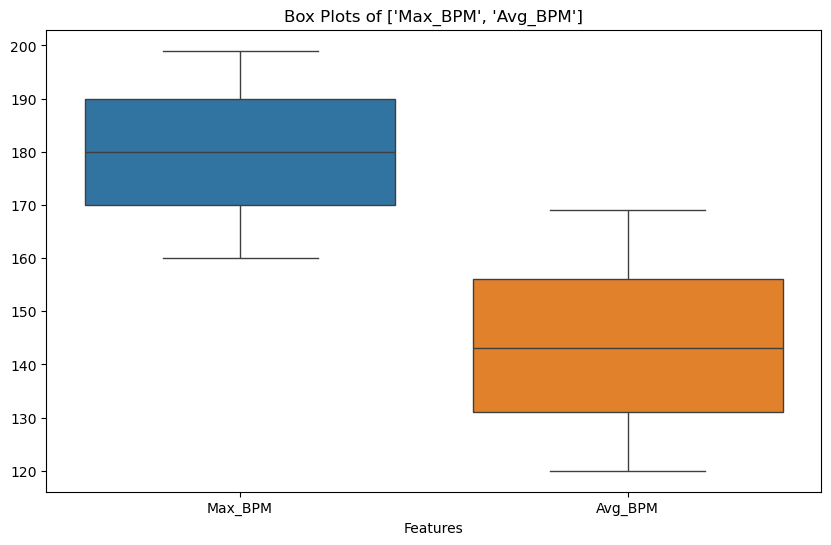

In [9]:
#Look for outliers

plt.figure(figsize = (10, 6))

for col in [['Max_BPM', 'Avg_BPM']]:
    sns.boxplot(df2[col])
    plt.xlabel('Features')
    plt.title(f'Box Plots of {col}')
    plt.show()

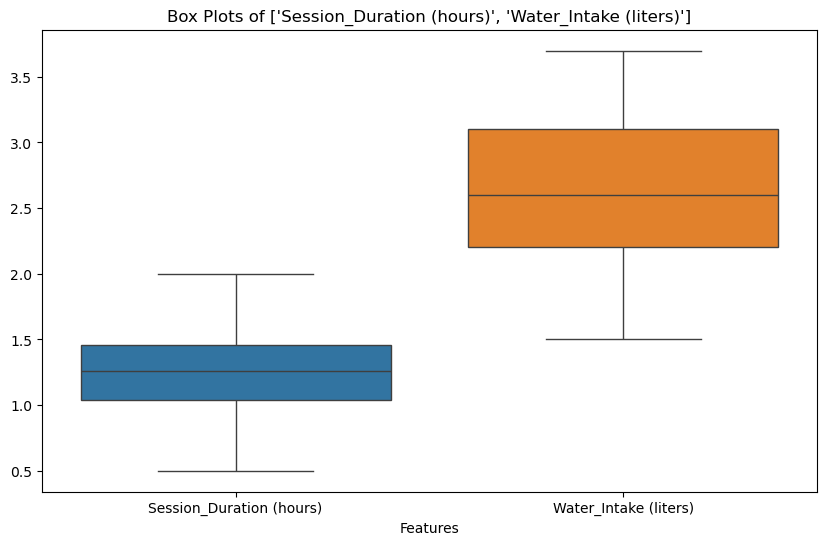

In [10]:
#Look for outliers

plt.figure(figsize = (10, 6))

for col in [['Session_Duration (hours)', 'Water_Intake (liters)']]:
    sns.boxplot(df2[col])
    plt.xlabel('Features')
    plt.title(f'Box Plots of {col}')
    plt.show()

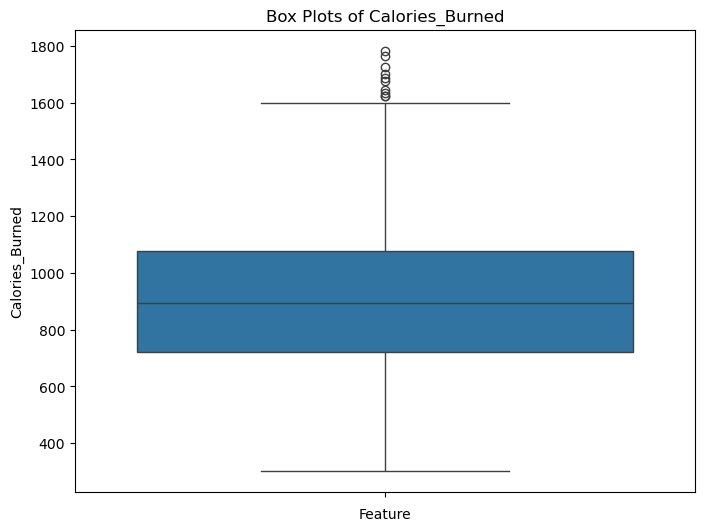

In [11]:
#Look for outliers

plt.figure(figsize = (8, 6))

for col in ['Calories_Burned']:
    sns.boxplot(df2[col])
    plt.xlabel('Feature')
    plt.title(f'Box Plots of {col}')
    plt.show()

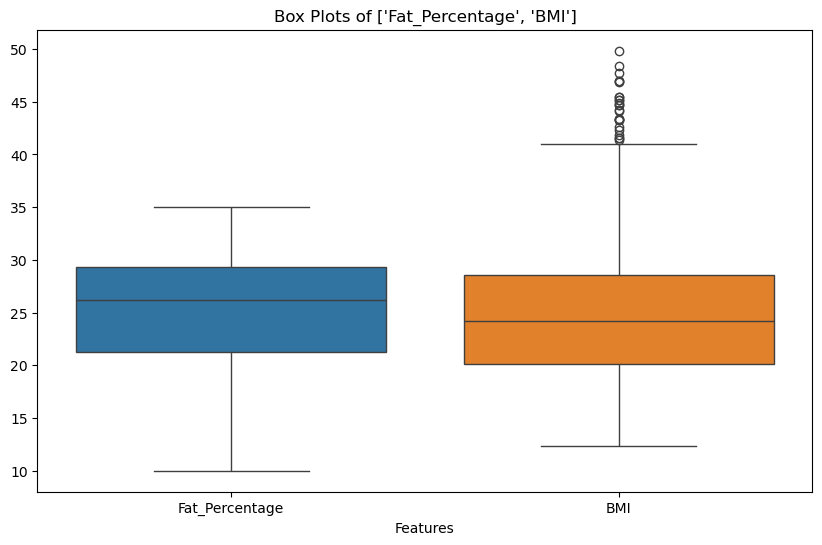

In [12]:
#Look for outliers

plt.figure(figsize = (10, 6))

for col in [['Fat_Percentage', 'BMI']]:
    sns.boxplot(df2[col])
    plt.xlabel('Features')
    plt.title(f'Box Plots of {col}')
    plt.show()

In [13]:
#Remove outliers ('Calories_Burned')

q1 = df2['Calories_Burned'].quantile(0.25)
q3 = df2['Calories_Burned'].quantile(0.75)

iqr = q3 - q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

condition1 = df2['Calories_Burned'] >= lower_limit
condition2 = df2['Calories_Burned'] <= upper_limit

df3 = df2[condition1 & condition2]

df3

,Gender,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Age_Group
0,Male,180,157,1.69,1313.0,Yoga,12.6,3.5,4,30.20,50s
1,Female,179,151,1.30,883.0,HIIT,33.9,2.1,4,32.00,40s
2,Female,167,122,1.11,677.0,Cardio,33.4,2.3,4,24.71,30s
3,Male,190,164,0.59,532.0,Strength,28.8,2.1,3,18.41,20s
4,Male,188,158,0.64,556.0,Strength,29.2,2.8,3,14.39,30s
...,...,...,...,...,...,...,...,...,...,...,...
968,Male,187,158,1.57,1364.0,Strength,10.0,3.5,4,28.77,20s
969,Male,184,166,1.38,1260.0,Strength,25.0,3.0,2,25.69,20s
970,Female,194,120,1.72,929.0,Cardio,18.8,2.7,5,19.50,50s
971,Male,198,146,1.10,883.0,HIIT,28.2,2.1,3,37.74,30s


In [14]:
#Remove outliers ('BMI')

q1 = df3['BMI'].quantile(0.25)
q3 = df3['BMI'].quantile(0.75)

iqr = q3 - q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

condition1 = df3['BMI'] >= lower_limit
condition2 = df3['BMI'] <= upper_limit

df4 = df3[condition1 & condition2]

df4

,Gender,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Age_Group
0,Male,180,157,1.69,1313.0,Yoga,12.6,3.5,4,30.20,50s
1,Female,179,151,1.30,883.0,HIIT,33.9,2.1,4,32.00,40s
2,Female,167,122,1.11,677.0,Cardio,33.4,2.3,4,24.71,30s
3,Male,190,164,0.59,532.0,Strength,28.8,2.1,3,18.41,20s
4,Male,188,158,0.64,556.0,Strength,29.2,2.8,3,14.39,30s
...,...,...,...,...,...,...,...,...,...,...,...
968,Male,187,158,1.57,1364.0,Strength,10.0,3.5,4,28.77,20s
969,Male,184,166,1.38,1260.0,Strength,25.0,3.0,2,25.69,20s
970,Female,194,120,1.72,929.0,Cardio,18.8,2.7,5,19.50,50s
971,Male,198,146,1.10,883.0,HIIT,28.2,2.1,3,37.74,30s


## EDA

In [15]:
#Look into correlations

df_for_corr = df4.drop(columns = ['Gender', 'Workout_Type', 'Age_Group'])

cor_matrix = df_for_corr.corr()

cor_matrix

,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
Max_BPM,1.000000,-0.049386,0.011077,-0.000265,-0.004490,0.020063,-0.031542,0.083471
Avg_BPM,-0.049386,1.000000,-0.011948,0.314442,0.025114,-0.025729,-0.030948,-0.011495
Session_Duration (hours),0.011077,-0.011948,1.000000,0.908394,-0.572470,0.275757,0.640863,0.009518
Calories_Burned,-0.000265,0.314442,0.908394,1.000000,-0.582186,0.344877,0.570688,0.055451
Fat_Percentage,-0.004490,0.025114,-0.572470,-0.582186,1.000000,-0.588672,-0.529603,-0.113197
Water_Intake (liters),0.020063,-0.025729,0.275757,0.344877,-0.588672,1.000000,0.229580,0.211108
Workout_Frequency (days/week),-0.031542,-0.030948,0.640863,0.570688,-0.529603,0.229580,1.000000,0.000617
BMI,0.083471,-0.011495,0.009518,0.055451,-0.113197,0.211108,0.000617,1.000000


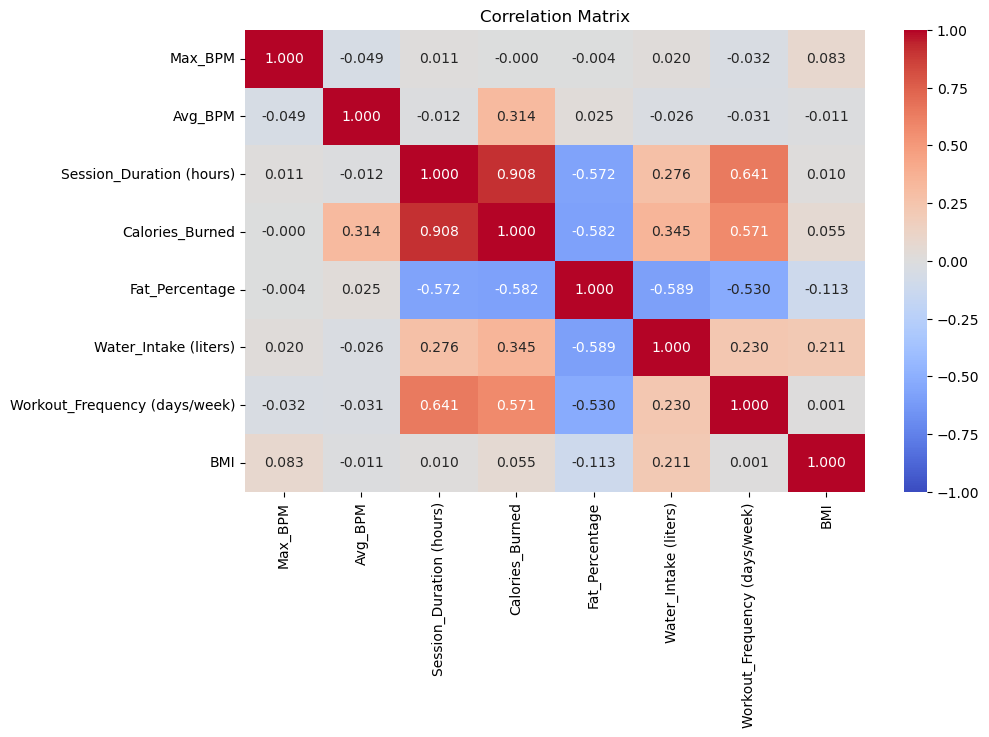

In [16]:
#Look into correlations

plt.figure(figsize = (10, 6))
sns.heatmap(cor_matrix, vmax = 1, vmin = -1, center = 0, fmt = '0.3f', annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

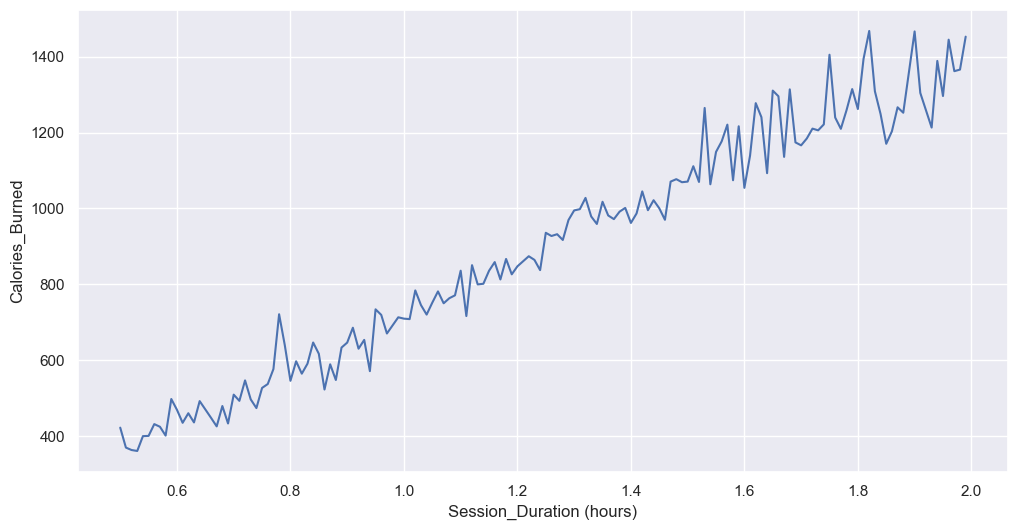

In [17]:
#Session duration and calories burned

sns.set_theme(rc = {'figure.figsize' : (12, 6)})
sns.lineplot(data = df4, x = 'Session_Duration (hours)', y = 'Calories_Burned', errorbar = None)
plt.show()

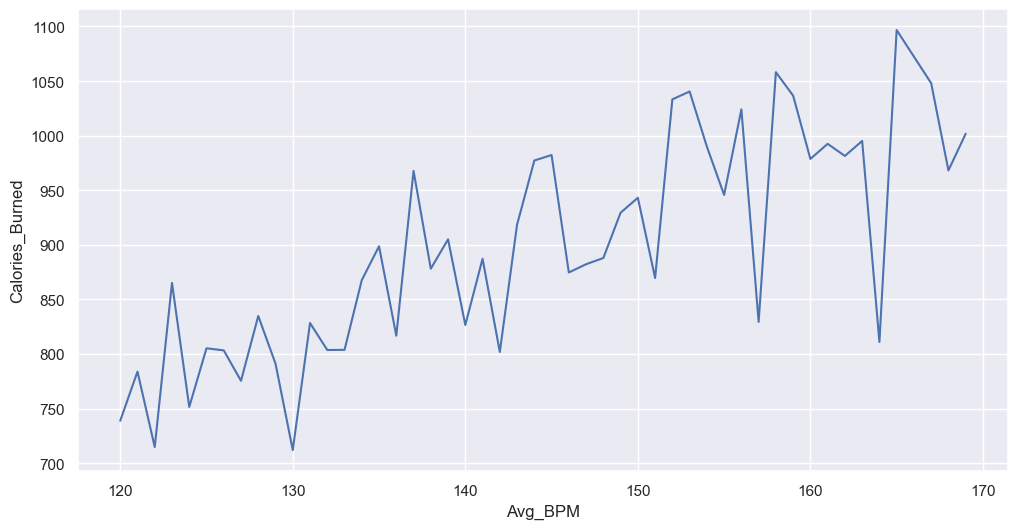

In [18]:
#Avg_BPM and calories burned

sns.set_theme(rc = {'figure.figsize' : (12, 6)})
sns.lineplot(data = df4, x = 'Avg_BPM' ,y = 'Calories_Burned', errorbar = None)
plt.show()

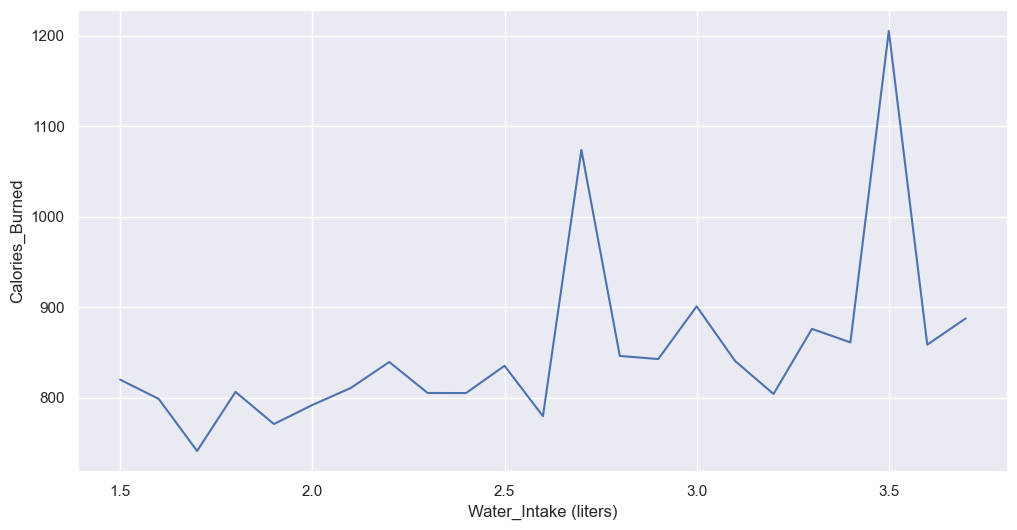

In [19]:
#Water intake and calories burned

sns.set_theme(rc = {'figure.figsize' : (12, 6)})
sns.lineplot(data = df4, x = 'Water_Intake (liters)' ,y = 'Calories_Burned', errorbar = None)
plt.show()

In [20]:
#Workout type, workout frequency, and calories burned

group1 = df4.groupby(['Workout_Type','Workout_Frequency (days/week)']).agg({'Calories_Burned':'mean'})

group1

Calories_Burned
Workout_Type Workout_Frequency (days/week)                 
Cardio       2                                   691.935484
             3                                   820.471910
             4                                  1004.902778
             5                                  1238.565217
HIIT         2                                   756.682927
             3                                   827.609756
             4                                   993.875000
             5                                  1266.625000
Strength     2                                   789.511111
             3                                   798.230000
             4                                   969.753086
             5                                  1242.434783
Yoga         2                                   691.782609
             3                                   829.083333
             4                                   982.853333
             5                                  1271.740741

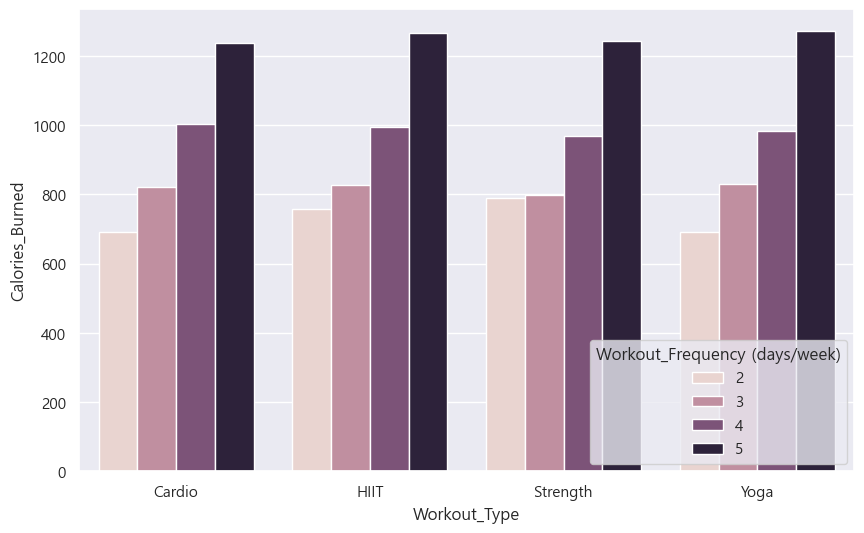

In [21]:
#Workout type, workout frequency, and calories burned

sns.set_theme(rc = {'figure.figsize' : (10, 6)}, font = 'Malgun Gothic', palette = 'muted')

bar_graph1 = sns.barplot(data = group1, x = 'Workout_Type', y = 'Calories_Burned', errorbar = None, hue = 'Workout_Frequency (days/week)')

sns.move_legend(bar_graph1, "lower right")

plt.show()

In [22]:
#Age group, workout type, and calories burned

group2 = df4.groupby(['Age_Group','Workout_Type']).agg({'Calories_Burned':'mean'})

group2

Calories_Burned
Age_Group Workout_Type                 
10s       Cardio             850.888889
          HIIT              1081.125000
          Strength           946.307692
          Yoga              1024.272727
20s       Cardio             951.690909
          HIIT               899.166667
          Strength           939.931034
          Yoga               909.132075
30s       Cardio             869.746032
          HIIT               964.604651
          Strength           931.500000
          Yoga               952.525000
40s       Cardio             898.654545
          HIIT               951.928571
          Strength           865.213115
          Yoga               899.661765
50s       Cardio             816.054545
          HIIT               826.785714
          Strength           837.584615
          Yoga               846.450000

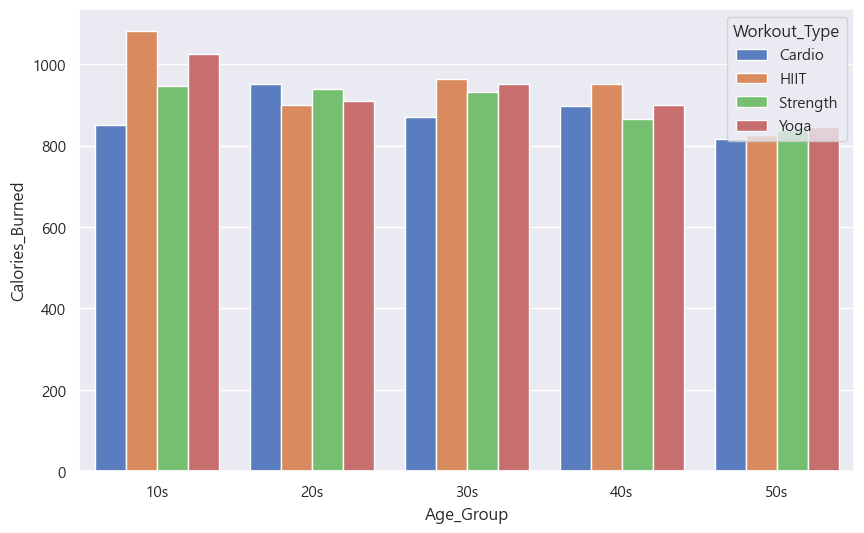

In [23]:
#Age group, workout type, and calories burned

sns.set_theme(rc = {'figure.figsize' : (10, 6)}, font = 'Malgun Gothic', palette = 'muted')

bar_graph2 = sns.barplot(data = group2, x = 'Age_Group', y = 'Calories_Burned', errorbar = None, hue = 'Workout_Type')

sns.move_legend(bar_graph1, "lower right")

plt.show()

In [24]:
#Gender, workout type, and calories burned

group3 = df4.groupby(['Gender','Workout_Type']).agg({'Calories_Burned':'mean'})

group3

Calories_Burned
Gender Workout_Type                 
Female Cardio             828.472000
       HIIT               869.953271
       Strength           863.097561
       Yoga               886.122642
Male   Cardio             935.561983
       HIIT               959.711538
       Strength           923.142857
       Yoga               917.357143

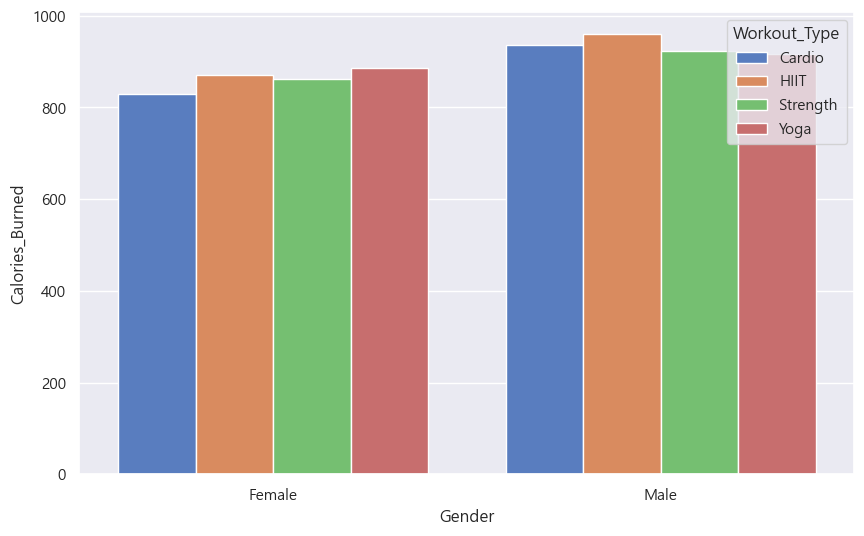

In [25]:
#Gender, workout type, and calories burned

sns.set_theme(rc = {'figure.figsize' : (10, 6)}, font = 'Malgun Gothic', palette = 'muted')

bar_graph3 = sns.barplot(data = group3, x = 'Gender', y = 'Calories_Burned', errorbar = None, hue = 'Workout_Type')

sns.move_legend(bar_graph1, "lower right")

plt.show()

## Develop a calory prediction model_XGBoost 

In [26]:
#XGBoost model -> Calory prediction

X = df4[['Avg_BPM', 'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'BMI']]
y = df4['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [27]:
# pip install --upgrade xgboost scikit-learn

In [28]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

xgb_model = XGBRegressor(
    n_estimators=100,    
    max_depth=5,         
    gamma=0,              
    importance_type='gain',
    reg_lambda=1,        
    random_state=100
)

xgb_model.fit(X_train, y_train)

preds = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, preds)

print(f"MAE: {mae}")

MAE: 49.02550571522814


In [30]:
#XGBoost model -> model test

test_df = pd.DataFrame({'Avg_BPM' : [120], 
                        'Session_Duration (hours)' : [2], 
                        'Fat_Percentage' : [17], 
                        'Water_Intake (liters)' : [1],
                        'Workout_Frequency (days/week)' : [3],
                        'BMI' : [30]})

xgb_model.predict(test_df)

array([1081.3279], dtype=float32)

## Develop a calory prediction model_Tensorflow regression

In [31]:
#Tensorflow regression model

tf.random.set_seed(42)

tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', name = 'layer_1'),
    tf.keras.layers.Dense(10, activation = 'relu', name = 'layer_2'),
    tf.keras.layers.Dense(1, name = 'output_layer')
])

tf_model.compile(loss = tf.keras.losses.mae, 
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['mae'])

In [32]:
train_history = tf_model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 880.5402 - mae: 880.5402
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 845.0499 - mae: 845.0499
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 798.0575 - mae: 798.0575
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 724.1552 - mae: 724.1552
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 608.1462 - mae: 608.1462
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 434.5843 - mae: 434.5843
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256.5095 - mae: 256.5095
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205.2520 - mae: 205.2520
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206.0532 - mae: 206.0532
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 204.1606 - mae: 204.1606
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 203.7782 - mae: 203.7782
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 203.3077 - mae

In [33]:
tf_model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 106.4361 - mae: 106.4361


[113.01057434082031, 113.01057434082031]

Text(0.5, 0, 'epochs')

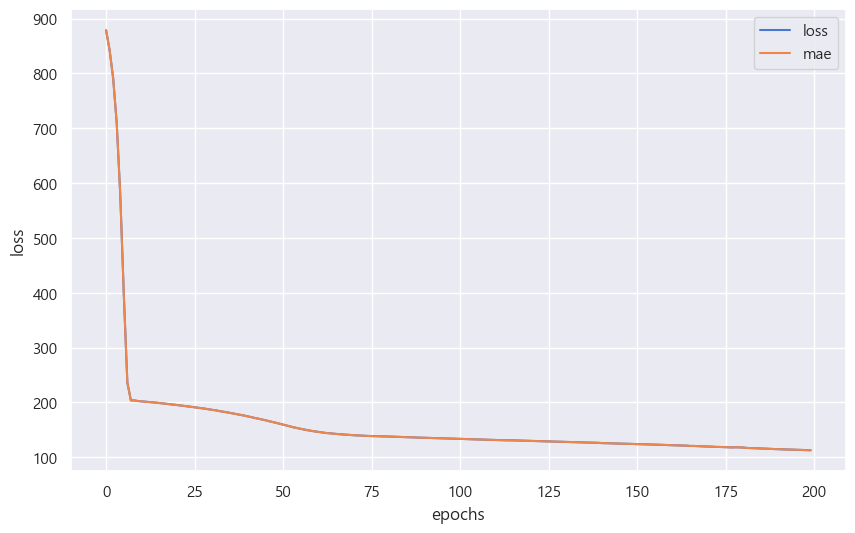

In [34]:
pd.DataFrame(train_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

## Develop a calory prediction model_Tensorflow regression (data standardization)

In [35]:
#Data standardization

standard_scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

standard_scaler.fit(X_train)

X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

In [36]:
tf.random.set_seed(42)

tf_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', name = 'layer_1'),
    tf.keras.layers.Dense(10, activation = 'relu', name = 'layer_2'),
    tf.keras.layers.Dense(1, name = 'output_layer')
])

tf_model2.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mae'])

In [37]:
train_history = tf_model2.fit(X_train_standard, y_train, epochs = 200)

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 892.8957 - mae: 892.8957
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 891.8031 - mae: 891.8031
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 889.0558 - mae: 889.0558
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 885.3840 - mae: 885.3840
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 879.6279 - mae: 879.6279
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 870.9235 - mae: 870.9235
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 858.3671 - mae: 858.3671
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 841.0197 - mae: 841.0197
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 817.9317 - mae: 817.9317
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 788.1500 - mae: 788.1500
Epoch 11/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 750.6778 - mae: 750.6778
Epoch 12/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 705.0673 - mae

In [38]:
tf_model2.evaluate(X_test_standard, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.8624 - mae: 49.8624 


[48.69206237792969, 48.69206237792969]

Text(0.5, 0, 'epochs')

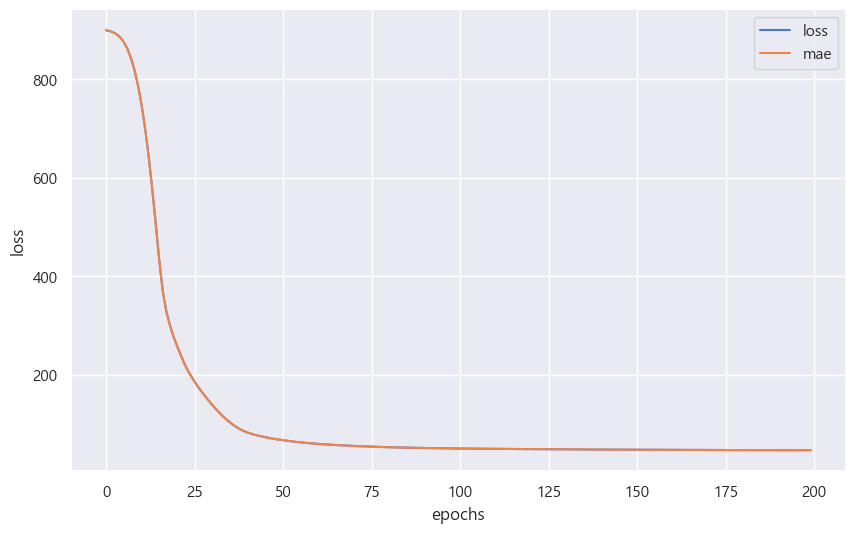

In [39]:
pd.DataFrame(train_history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')